In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array

Banh_gio = '/content/drive/MyDrive/DOCUMENTS/Food_data/banh_gio'
Banh_mi = '/content/drive/MyDrive/DOCUMENTS/Food_data/banh_mi'
Banh_xeo = '/content/drive/MyDrive/DOCUMENTS/Food_data/banh_xeo'
Bap_xao = '/content/drive/MyDrive/DOCUMENTS/Food_data/bap_xao'
Bun_dau_mam_tom = '/content/drive/MyDrive/DOCUMENTS/Food_data/bun_dau_mam_tom'
Chao_long = '/content/drive/MyDrive/DOCUMENTS/Food_data/chao_long'
Chuoi_chien = '/content/drive/MyDrive/DOCUMENTS/Food_data/chuoi_chien'
Com_tam = '/content/drive/MyDrive/DOCUMENTS/Food_data/com_tam'
Pho = '/content/drive/MyDrive/DOCUMENTS/Food_data/pho'
Xoi_gac = '/content/drive/MyDrive/DOCUMENTS/Food_data/xoi_gac'

folders = [Banh_gio, Banh_mi, Banh_xeo, Bap_xao, Bun_dau_mam_tom, Chao_long, Chuoi_chien, Com_tam, Pho, Xoi_gac]
photos, labels = list(), list()
for i in range(10):
  for file in listdir(folders[i]):
    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)              
    labels.append(i) 
    
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dưới dạng mảng
class_name = ['Bánh giò', 'Bánh mì', 'Bánh xèo', 'Bắp xào', 'Bún đậu mắm tôm', 'Cháo lòng', 'Chuối chiên', 'Cơm tấm', 'Phở', 'Xôi gấc']           

print(photos.shape, labels.shape)
print(class_name)
save('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Foods_CNN_photos.npy',photos)
save('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Foods_CNN_labels.npy',labels)

(6680, 100, 100, 3) (6680,)
['Bánh giò', 'Bánh mì', 'Bánh xèo', 'Bắp xào', 'Bún đậu mắm tôm', 'Cháo lòng', 'Chuối chiên', 'Cơm tấm', 'Phở', 'Xôi gấc']


In [ ]:
import numpy as np
photos = np.load('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Fruits_CNN_photos.npy')
labels = np.load('/content/drive/MyDrive/DOCUMENTS/data_fruit/FILE_NPY/Fruit_CNN_labels.npy')

In [ ]:
photos.shape

(6680, 100, 100, 3)

In [ ]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=2)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5010, 100, 100, 3) (1670, 100, 100, 3)
(5010,) (1670,)


In [ ]:
x_train[0]

array([[[216., 220., 232.],
        [213., 215., 227.],
        [212., 214., 226.],
        ...,
        [219., 220., 225.],
        [216., 219., 224.],
        [217., 220., 225.]],

       [[218., 222., 234.],
        [214., 216., 228.],
        [213., 215., 227.],
        ...,
        [220., 221., 226.],
        [220., 221., 226.],
        [219., 222., 227.]],

       [[219., 223., 235.],
        [217., 219., 231.],
        [213., 215., 227.],
        ...,
        [221., 222., 227.],
        [216., 217., 222.],
        [222., 225., 230.]],

       ...,

       [[216., 210., 210.],
        [219., 214., 211.],
        [216., 206., 205.],
        ...,
        [181., 174., 168.],
        [191., 182., 177.],
        [194., 188., 188.]],

       [[218., 212., 212.],
        [219., 213., 213.],
        [221., 215., 215.],
        ...,
        [192., 187., 183.],
        [195., 190., 187.],
        [203., 199., 200.]],

       [[214., 210., 209.],
        [216., 212., 211.],
        [213., 2

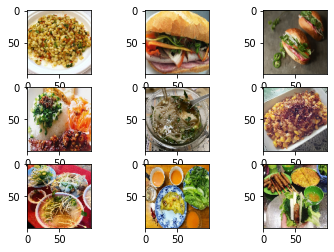

In [ ]:
#show 9 ảnh đầu tiên trong tập dữ liệu train       
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [ ]:
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  
model.add(Dense(10, activation='Softmax'))

In [ ]:
#train model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128,epochs=100,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/DOCUMENTS/MODEL_STORES/model_foods_CNN.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
40/40 [==============================] - 5s 113ms/step - loss: 2.4798 - accuracy: 0.1850 - val_loss: 2.1177 - val_accuracy: 0.2120
Epoch 2/100
40/40 [==============================] - 4s 103ms/step - loss: 1.9607 - accuracy: 0.2896 - val_loss: 1.8428 - val_accuracy: 0.3527
Epoch 3/100
40/40 [==============================] - 4s 100ms/step - loss: 1.6888 - accuracy: 0.4020 - val_loss: 1.8970 - val_accuracy: 0.3395
Epoch 4/100
40/40 [==============================] - 4s 101ms/step - loss: 1.5464 - accuracy: 0.4567 - val_loss: 1.5163 - val_accuracy: 0.4820
Epoch 5/100
40/40 [==============================] - 4s 99ms/step - loss: 1.4110 - accuracy: 0.5251 - val_loss: 1.4828 - val_accuracy: 0.4934
Epoch 6/100
40/40 [==============================] - 4s 100ms/step - loss: 1.2415 - accuracy: 0.5808 - val_loss: 1.4049 - val_accuracy: 0.5222
Epoch 7/100
40/40 [==============================] - 4s 104ms/step - loss: 1.0946 - accuracy: 0.6212 - val_loss: 1.4504 - val_accuracy: 0.5257


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  3.3168277740478516
test accuracy:  0.5934131741523743
[6.1268955e-05 1.9088351e-09 1.7913258e-08 ... 1.5189149e-03 2.3458199e-12
 1.4888220e-10]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


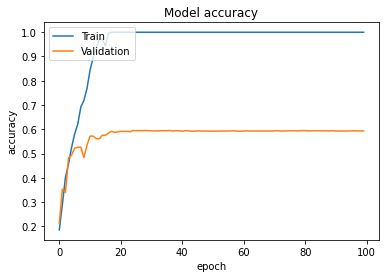

In [ ]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[9.3745454e-13 1.7719173e-10 4.9987854e-09 5.3118338e-15 1.0000000e+00
  1.7943038e-16 6.5928508e-16 5.8853395e-12 2.0637630e-19 7.5530879e-13]]
Đây là món Bún đậu mắm tôm


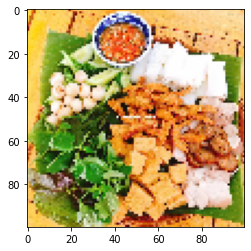

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

#load ảnh
img = load_img('bun_dau_test1.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Đây là món',class_name[int(a)])

[[2.5701041e-08 8.4870338e-01 1.5129420e-01 1.8524832e-12 5.4238850e-16
  5.8172166e-08 1.2263346e-06 4.9698548e-13 1.1401702e-06 2.1762003e-18]]
Đây là món Bánh mì


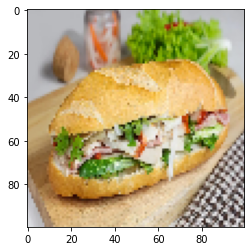

In [ ]:
#load ảnh
img = load_img('banh_mi_test1.jpeg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Đây là món',class_name[int(a)])

[[2.8589490e-13 1.2373049e-09 9.9999988e-01 1.3396011e-07 1.1625022e-09
  2.7845397e-14 6.9377295e-09 1.0024678e-14 4.8301024e-14 3.3901115e-12]]
Đây là món Bánh xèo


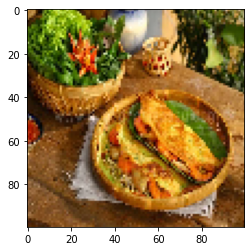

In [ ]:
#load ảnh
img = load_img('banh_xeo_test2.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Đây là món',class_name[int(a)])

[[2.9242120e-10 3.5528663e-12 9.0365115e-10 2.4615704e-13 7.5362172e-10
  3.8330589e-07 6.3410046e-09 9.9999964e-01 1.7045891e-09 1.6834714e-12]]
Đây là món Cơm tấm


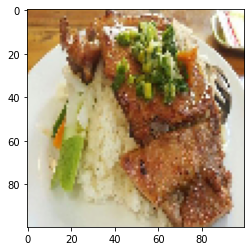

In [ ]:
#load ảnh
img = load_img('com_tam_test2.jpg', target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img/=255.0

#dự đoán
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Đây là món',class_name[int(a)])